# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv('athlete_events.csv')
df2 = pd.read_csv('athlete_events_data_dictionary.csv')
df3 = pd.read_csv('country_definitions.csv')
df4 = pd.read_csv('country_definitions_data_dictionary.csv')

# df5 = pd.read_csv('athlete_events.csv')

In [87]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [88]:
df.shape

(271116, 15)

In [89]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [90]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### Checking the missing values

In [92]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

#### we found that we have a missing values that needs to be filled

## Filling Missing Values

#### We fill the missing values using different methods

In [93]:
# Fill Age missing values with median
numeric_columns = ['Age']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median()).round(1)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [94]:
# Fill missing values in numeric columns with the median and round to one decimal place
numeric_columns = ['Height']
# df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mode()).round(1)
# df

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mode().iloc[0])

In [95]:
# Fill Age missing values with median
numeric_columns = ['Weight']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean()).round(1)
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,70.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,180.0,70.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [96]:
# Replace NaN values with "No Medals"
df['Medal'].fillna("No Medals", inplace=True)

#### we checked if we filled all the missing values

In [97]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

#### We no longer  have any missing values in the dataset

 ## Checking for identical Values in df1 and Country Description

In [98]:
# Load the data files into dataframes
df1 = pd.read_csv('athlete_events.csv')  # Replace with the actual file path of data file 1
df2 = pd.read_csv('country_definitions.csv')  # Replace with the actual file path of data file 2

# Compare the values in specific columns (assuming 'column_to_compare' is the column to compare)
values_only_in_df1 = df1[~df1['Team'].isin(df2['region'])]
values_only_in_df2 = df2[~df2['region'].isin(df1['Team'])]

# # Print values that are not present in both
# print("Values only in df1:")
# print(values_only_in_df1)

print("\nValues only in df2:")
print(values_only_in_df2)

# unique_noc_count = df['NOC'].nunique()


Values only in df2:
     NOC                            region                     notes
1    AHO                           Curacao      Netherlands Antilles
6    ANT                           Antigua       Antigua and Barbuda
27   BOL                            Boliva                       NaN
38   CGO                 Republic of Congo                       NaN
42   CIV                       Ivory Coast                       NaN
44   COD  Democratic Republic of the Congo                       NaN
71   FSM                        Micronesia                       NaN
74   GBR                                UK                       NaN
75   GBS                     Guinea-Bissau                       NaN
99   ISV                Virgin Islands, US            Virgin Islands
101  IVB           Virgin Islands, British                       NaN
168  ROT                               NaN      Refugee Olympic Team
179  SKN                       Saint Kitts  Turks and Caicos Islands
202  TLS     

### Checking the outliers using the box plot

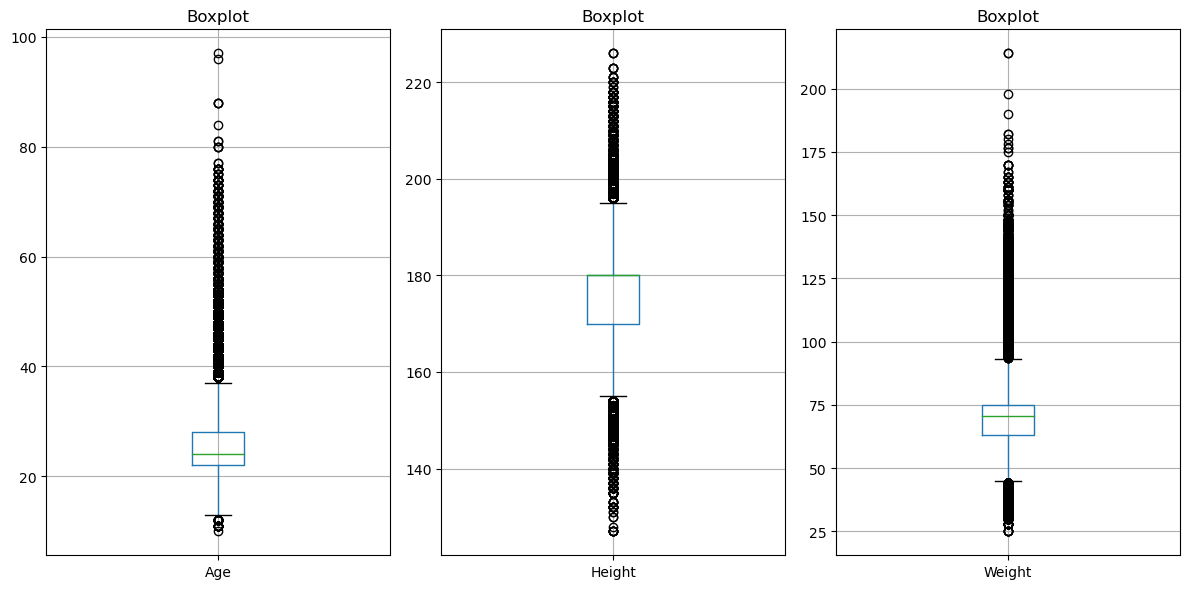

In [99]:
# List of numerical features to check for outliers
numerical_features = ['Age', 'Height', 'Weight']

# Create boxplots for numerical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    df.boxplot(column=feature)
    plt.title(f'Boxplot')

plt.tight_layout()
plt.show()

#### from observation of the Boxsplot we can see that we have an outliers of Age, Height and Weight and it needs to be removed

### Counting the number of outliers

In [100]:
# Function to count outliers for a specific column using IQR method
def count_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = len(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)])
    return outliers_count, lower_bound, upper_bound

# Count outliers for each column
outliers_age, age_lower_bound, age_upper_bound  = count_outliers(df, 'Age')
outliers_height, height_lower_bound, height_upper_bound = count_outliers(df, 'Height')
outliers_weight, weight_lower_bound, weight_upper_bound = count_outliers(df, 'Weight')
# outliers_year = count_outliers(df', Year')


# Print the counts
print(f'Number of outliers in Age: {outliers_age}')
print(f'Number of outliers in Height: {outliers_height}')
print(f'Number of outliers in Weight: {outliers_weight}')

Number of outliers in Age: 11981
Number of outliers in Height: 10532
Number of outliers in Weight: 15574


In [101]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

### Removing the outliers

In [102]:
# Function to remove outliers for a specific column using IQR method
def remove_outliers_iqr(df, column_name, lower_bound_factor=1.5, upper_bound_factor=1.5):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - lower_bound_factor * IQR
    upper_bound = Q3 + upper_bound_factor * IQR
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

# Remove outliers for 'Age', 'Height', and 'Weight' with less strict bounds
columns_to_remove_outliers = ['Height', 'Age', 'Weight']
for column in columns_to_remove_outliers:
    df = remove_outliers_iqr(df, column, lower_bound_factor=1.5, upper_bound_factor=1.5)


In [103]:
# Function to remove outliers for a specific column using IQR method
def remove_outliers_iqr(df, column_name, lower_bound_factor=1.5, upper_bound_factor=1.5):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - lower_bound_factor * IQR
    upper_bound = Q3 + upper_bound_factor * IQR
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered

# Remove outliers for 'Age', 'Height', and 'Weight' with less strict bounds
columns_to_remove_outliers = ['Height', 'Age', 'Weight']
for column in columns_to_remove_outliers:
    df = remove_outliers_iqr(df, column, lower_bound_factor=1.5, upper_bound_factor=1.5)


#### checking if we still have the outliers

In [104]:
# Count number of outliers
age_outliers_count = len(df[(df['Age'] < age_lower_bound) | (df['Age'] > age_upper_bound)])
height_outliers_count = len(df[(df['Height'] < height_lower_bound) | (df['Height'] > height_upper_bound)])
weight_outliers_count = len(df[(df['Weight'] < weight_lower_bound) | (df['Weight'] > weight_upper_bound)])

# Print the counts
print(f'Number of outliers in Age: {age_outliers_count}')
print(f'Number of outliers in Height: {height_outliers_count}')
print(f'Number of outliers in Weight: {weight_outliers_count}')

Number of outliers in Age: 0
Number of outliers in Height: 0
Number of outliers in Weight: 0


#### we found that all ouliers have been removed

#### Box plot after removing outliers

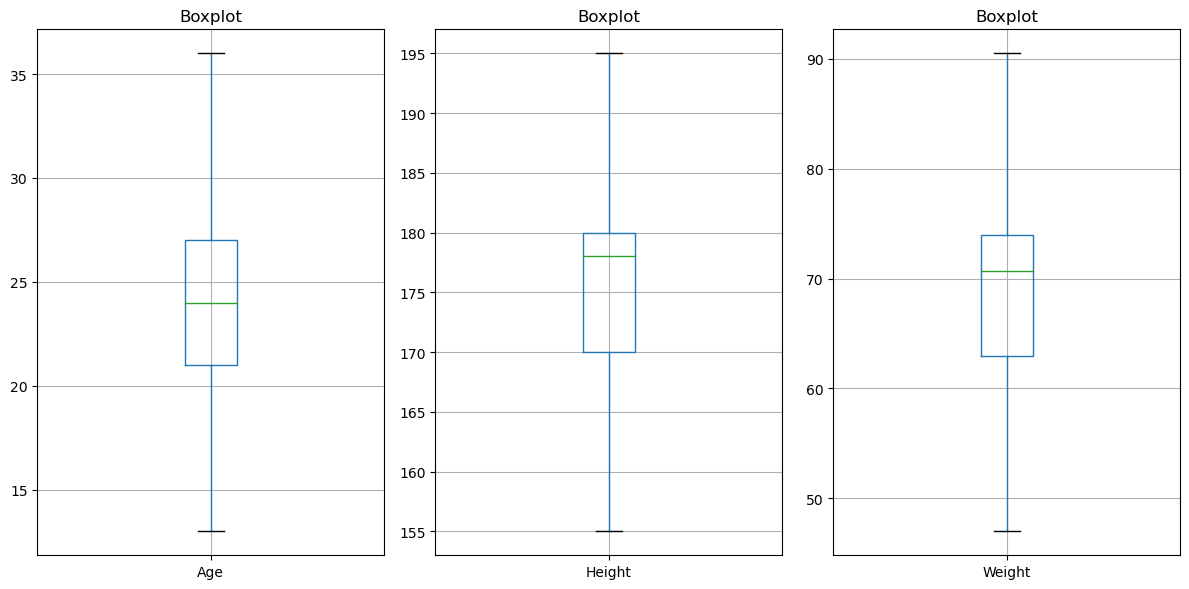

In [106]:
# List of numerical features to check for outliers
numerical_features = ['Age', 'Height', 'Weight']

# Create boxplots for numerical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    df.boxplot(column=feature)
    plt.title(f'Boxplot')

plt.tight_layout()
plt.show()

In [22]:
df.shape

(239245, 15)

In [23]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medals
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medals
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,70.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medals
3,4,Edgar Lindenau Aabye,M,34.0,180.0,70.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medals


In [24]:
df['Year'].unique()

array([1992, 2012, 1920, 1900, 1988, 1994, 1932, 1952, 1980, 2000, 1996,
       1912, 1924, 2014, 1948, 1998, 2002, 2006, 2008, 2004, 1960, 1964,
       1984, 1936, 1956, 1928, 2016, 1976, 1972, 1968, 2010, 1906, 1904,
       1908, 1896], dtype=int64)

In [25]:
## Checking if the countries are correct or not in the team column
sorted(df['Team'].unique())

['30. Februar',
 'A North American Team',
 'Acturus',
 'Afghanistan',
 'Akatonbo',
 'Albania',
 'Alcaid',
 'Alcyon-6',
 'Alcyon-7',
 'Aldebaran',
 'Aldebaran II',
 'Aletta',
 'Algeria',
 'Ali-Baba II',
 'Ali-Baba IV',
 'Allegro',
 'Almaz',
 'Aloha II',
 'Amateur Athletic Association',
 'American Samoa',
 'Amolgavar',
 'Amstel Amsterdam',
 'Amulet-3',
 'Amulet-7',
 'Ancora',
 'Andorinha',
 'Andorra',
 'Andromeda',
 'Angelita',
 'Angerburg',
 'Angola',
 'Anitra',
 'Antares',
 'Antigua and Barbuda',
 'Antwerpia V',
 'Apache',
 'Aphrodite',
 'Arcturus',
 'Ardilla',
 'Aretusa',
 'Argentina',
 'Argentina-1',
 'Argentina-2',
 'Argeste',
 'Argo II',
 'Argonaut Rowing Club',
 'Argus',
 'Ariel',
 'Armenia',
 'Aruba',
 'Aschenbrodel',
 'Astrid III',
 'Atalanta Boat Club-1',
 'Atalanta Boat Club-2',
 'Athens-2',
 'Atlanta',
 'Augsburg',
 'Australasia',
 'Australia',
 'Australia-1',
 'Australia-2',
 'Australia-3',
 'Australia/Great Britain',
 'Austria',
 'Austria-1',
 'Austria-2',
 'Azerbaijan',
 '

In [26]:
## Checking the NOC of the random team
df[df['Team'] == 'Beatrijs III-1']

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
96101,48660,"Franciscus Fidelio Joseph ""Frans"" Hin",M,14.0,180.0,70.7,Beatrijs III-1,NED,1920 Summer,1920,Summer,Antwerpen,Sailing,Sailing Mixed 12 foot,Gold
96102,48661,"Johannes Jozef Antonius ""Johan"" Hin",M,21.0,180.0,70.7,Beatrijs III-1,NED,1920 Summer,1920,Summer,Antwerpen,Sailing,Sailing Mixed 12 foot,Gold


In [27]:
## checking the file of countries description
df3.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [28]:
df3.isnull().sum()

NOC         0
region      3
notes     209
dtype: int64

In [29]:
# Load the data files into dataframes
df1 = pd.read_csv('athlete_events.csv')  
df2 = pd.read_csv('country_definitions.csv')  


values_only_in_df1 = df1[~df1['Team'].isin(df2['region'])]
values_only_in_df2 = df2[~df2['region'].isin(df1['Team'])]

print("Values only in df1:")
values_only_in_df1



Values only in df1:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271100,135561,Frantiek Zyka,M,26.0,NaN,NaN,Czechoslovakia,TCH,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's Marathon,NaN
271101,135562,Milan Zyka,M,24.0,173.0,68.0,Czechoslovakia,TCH,1972 Summer,1972,Summer,Munich,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN
271104,135564,Yevgeny Aleksandrovich Zykov,M,22.0,172.0,65.0,Russia-1,RUS,2002 Winter,2002,Winter,Salt Lake City,Luge,Luge Mixed (Men)'s Doubles,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN


In [30]:
values_only_in_df1['Team'].unique()

array(['Denmark/Sweden', 'United States', 'Taifun', 'Soviet Union',
       'United Arab Republic', 'Thessalonki-1', 'North Yemen',
       'Unified Team', 'Japan-1', 'Congo (Brazzaville)', 'West Germany',
       'East Germany', 'Fornebo', 'Vesper Boat Club',
       'United States Virgin Islands', "Cote d'Ivoire", 'France-1',
       'Great Britain', 'Russia-2', 'Russia-1', 'France-2',
       'Switzerland-2', 'Switzerland-1', 'Czechoslovakia',
       'Great Britain-1', 'Saint Kitts and Nevis',
       'New York Athletic Club #2-4', 'Trinidad and Tobago',
       'Saint Vincent and the Grenadines', 'Mystery', 'Nigeria-2',
       'Germany-2', 'Clementine V', 'Bylina-2', 'Netherlands Antilles',
       'Great Britain-2', 'Stella-2', 'United States-1',
       'United States-2', 'Argentina-2',
       'Large boat, Central Naval Prep School "Poros"-1', 'Xolotl',
       'Matrero II', 'Blue Red', 'Gteborgs Roddklubb-1', 'Indonesia-1',
       'Germany-1', 'South Yemen', 'Lucky Girl-1', 'Mutafo', 'Swed

In [31]:
##Checking the NOC
values_only_in_df1['NOC'].unique()

array(['DEN', 'USA', 'NOR', 'URS', 'UAR', 'GRE', 'YAR', 'EUN', 'JPN',
       'CGO', 'FRG', 'GDR', 'ISV', 'CIV', 'FRA', 'GBR', 'RUS', 'SUI',
       'TCH', 'SKN', 'TTO', 'VIN', 'NGR', 'GER', 'BRA', 'AHO', 'ARG',
       'MEX', 'SWE', 'INA', 'YMD', 'FIN', 'ITA', 'ANZ', 'SCG', 'CAN',
       'YUG', 'IVB', 'MAL', 'IRL', 'ESP', 'GBS', 'PUR', 'TLS', 'COD',
       'ROT', 'CAM', 'KOR', 'BEL', 'CRT', 'AUT', 'ROU', 'BOL', 'SAA',
       'ANT', 'THA', 'LAT', 'AUS', 'BUL', 'HKG', 'FSM', 'MON', 'UKR',
       'BLR', 'RHO', 'TPE', 'HUN', 'POL', 'BOH', 'POR', 'TUR', 'MRI',
       'ISR', 'CZE', 'RSA', 'WIF', 'NED', 'IND', 'URU', 'NBO', 'VNM',
       'ZIM', 'CHN', 'VEN', 'MAS', 'PRK', 'MYA', 'CUB', 'BAH', 'SGP',
       'BER', 'NZL', 'SRB', 'UNK', 'TUV', 'EST', 'NFL', 'PHI', 'SVK',
       'JAM', 'HAI', 'COL', 'LUX', 'SLO', 'UZB', 'MLT', 'LIB', 'CHI'],
      dtype=object)

In [32]:
df[df['NOC'] == 'SGP'].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
578,332,Zarinah Abdullah,F,21.0,180.0,70.7,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,No Medals
579,332,Zarinah Abdullah,F,25.0,180.0,70.7,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,No Medals
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,No Medals
7659,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,No Medals
7660,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,No Medals


In [33]:
df['NOC'].unique()

array(['CHN', 'DEN', 'NED', 'USA', 'FIN', 'NOR', 'EST', 'FRA', 'MAR',
       'ESP', 'EGY', 'IRI', 'BUL', 'CHA', 'AZE', 'SUD', 'RUS', 'ARG',
       'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX', 'ITA', 'NCA',
       'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ', 'UAR', 'LIB',
       'QAT', 'MAS', 'GER', 'IRL', 'AUS', 'RSA', 'CAN', 'ERI', 'TAN',
       'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM', 'KAZ', 'BRU',
       'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'YAR', 'INA', 'URS', 'PHI',
       'UAE', 'SGP', 'UZB', 'KGZ', 'TJK', 'JPN', 'CGO', 'SUI', 'BRA',
       'FRG', 'GDR', 'MON', 'URU', 'SWE', 'ISV', 'SRI', 'ARM', 'CIV',
       'KEN', 'BEN', 'UKR', 'GBR', 'GHA', 'SOM', 'LAT', 'NIG', 'MLI',
       'AFG', 'ROU', 'POL', 'CRC', 'PAN', 'GEO', 'SLO', 'CRO', 'GUY',
       'NZL', 'POR', 'PAR', 'VEN', 'COL', 'BAN', 'PER', 'ESA', 'PUR',
       'UGA', 'HON', 'ECU', 'TKM', 'MRI', 'SEY', 'TCH', 'LUX', 'MTN',
       'CZE', 'SKN', 'TTO', 'VIN', 'JAM', 'LBR', 'SUR', 'NEP', 'ISR',
       'MGL', 'AUT',

In [34]:
df3.shape

(230, 3)

In [35]:
unique_noc_count = df['NOC'].nunique()
print(f"Count of unique values in 'NOC' column: {unique_noc_count}")

Count of unique values in 'NOC' column: 230


In [36]:
# Load the data files into dataframes
df5 = pd.read_csv('country_definitions.csv') 


values_only_in_df1 = df1[~df1['Team'].isin(df5['region'])]
values_only_in_df5 = df5[~df5['region'].isin(df1['Team'])]


print("\nValues only in df5:")
values_only_in_df5



Values only in df5:


,NOC,region,notes
1,AHO,Curacao,Netherlands Antilles
6,ANT,Antigua,Antigua and Barbuda
27,BOL,Boliva,NaN
38,CGO,Republic of Congo,NaN
42,CIV,Ivory Coast,NaN
44,COD,Democratic Republic of the Congo,NaN
71,FSM,Micronesia,NaN
74,GBR,UK,NaN
75,GBS,Guinea-Bissau,NaN
99,ISV,"Virgin Islands, US",Virgin Islands


In [37]:
df2[df2['NOC'] == 'SGP'].head()

,NOC,region,notes


In [38]:
# Assuming 'Team' is the column to compare
values_only_in_df1 = df1[~df1['Team'].isin(df2['region'])]

# Print values that are in df1 but not in df2
print("Values only in df1:")
values_only_in_df1


Values only in df1:


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
10,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
11,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
12,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
13,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271100,135561,Frantiek Zyka,M,26.0,NaN,NaN,Czechoslovakia,TCH,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's Marathon,NaN
271101,135562,Milan Zyka,M,24.0,173.0,68.0,Czechoslovakia,TCH,1972 Summer,1972,Summer,Munich,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",NaN
271104,135564,Yevgeny Aleksandrovich Zykov,M,22.0,172.0,65.0,Russia-1,RUS,2002 Winter,2002,Winter,Salt Lake City,Luge,Luge Mixed (Men)'s Doubles,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN


In [39]:
import pandas as pd

# Load the data files into dataframes

df5 = pd.read_csv(r'country_definitions.csv')

# Print the columns in df5
print("Columns in df5:", df5.columns)

# Create a mapping of NOC to Team from df5
noc_to_team_mapping = df5.set_index('NOC')['region'].to_dict()  # Assuming 'region' is the correct column name

# Replace incorrect Team values in df1 based on the mapping
df['Corrected_Team'] = df['NOC'].map(noc_to_team_mapping)

# If a correct Team value is not found, keep the original Team value
df['Corrected_Team'].fillna(df['Team'], inplace=True)

# Print the updated DataFrame with corrected Team values
print(df[['NOC', 'Team', 'Corrected_Team']])


Columns in df5: Index(['NOC', 'region', 'notes'], dtype='object')
        NOC            Team Corrected_Team
0       CHN           China          China
1       CHN           China          China
2       DEN         Denmark        Denmark
3       DEN  Denmark/Sweden        Denmark
4       NED     Netherlands    Netherlands
...     ...             ...            ...
271109  RUS          Russia         Russia
271110  BLR         Belarus        Belarus
271111  POL        Poland-1         Poland
271112  POL          Poland         Poland
271113  POL          Poland         Poland

[239245 rows x 3 columns]


In [40]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Corrected_Team
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medals,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medals,China
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,70.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medals,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,180.0,70.7,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medals,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,No Medals,Russia
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,No Medals,Belarus
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medals,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medals,Poland


## Replace Team with countries from country desciption

In [41]:

# Load the data files into dataframes
df5 = pd.read_csv(r'country_definitions.csv')
# Print the columns in df5
print("Columns in df5:", df5.columns)

# Create a mapping of NOC to Team from df5
noc_to_team_mapping = df5.set_index('NOC')['region'].to_dict()  
# Replace 'Team' values in df1 with corrected values
df['Team'] = df['NOC'].map(noc_to_team_mapping).fillna(df['Team'])

# Print the updated DataFrame with corrected Team values
print(df[['NOC', 'Team']])


Columns in df5: Index(['NOC', 'region', 'notes'], dtype='object')
        NOC         Team
0       CHN        China
1       CHN        China
2       DEN      Denmark
3       DEN      Denmark
4       NED  Netherlands
...     ...          ...
271109  RUS       Russia
271110  BLR      Belarus
271111  POL       Poland
271112  POL       Poland
271113  POL       Poland

[239245 rows x 2 columns]


#### Checking NOC which is not in the countries description


In [42]:
# Load the athlete_events.csv and country_definitions.csv files
athlete_events_df = pd.read_csv('athlete_events.csv')
country_definitions_df = pd.read_csv('country_definitions.csv')

# Get unique values in 'NOC' from athlete_events.csv
athlete_events_noc_values = df['NOC'].unique()

# Get unique values in 'NOC' from country_definitions.csv
country_definitions_noc_values = df5['NOC'].unique()

# Find values in athlete_events_noc_values that are not in country_definitions_noc_values
values_not_in_country_definitions = set(athlete_events_noc_values) - set(country_definitions_noc_values)

# Convert the result to a list
values_not_in_country_definitions_list = list(values_not_in_country_definitions)

# Print or save the values not in country_definitions
print("Values in athlete_events.csv 'NOC' not in country_definitions.csv 'NOC':")
print(values_not_in_country_definitions_list)

Values in athlete_events.csv 'NOC' not in country_definitions.csv 'NOC':
['SGP']


##### SGP is not in the countries description

In [43]:
# for index, row in df.iterrows():
#     if row['NOC'] == 'USA':
#         df.at[index, 'Team'] = 'United States'
        
# df.head()

#### we update team corresponding to SGP manualy

In [44]:
# Loop through the rows of df and replace 'Team' with 'Singapore' for 'NOC' equal to 'SGP'
for index, row in df.iterrows():
    if row['NOC'] == 'SGP':
        df.at[index, 'Team'] = 'Singapore'
df[df['NOC'] == 'SGP'].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Corrected_Team
578,332,Zarinah Abdullah,F,21.0,180.0,70.7,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,No Medals,Singapore
579,332,Zarinah Abdullah,F,25.0,180.0,70.7,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,No Medals,Singapore
2719,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.0,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,No Medals,Singapore
7659,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,No Medals,Singapore
7660,4264,Ang Peng Siong,M,21.0,180.0,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,No Medals,Singapore


In [45]:
# Use the .loc method to locate rows where 'NOC' is 'USA' and set 'Team' to 'United States of America'
df.loc[df['NOC'] == 'USA', 'Team'] = 'United States of America'

In [46]:
#df['Team'].unique()

### Remove sports that are not olympic sports

In [47]:
#Checking the unique sports
unique_sports = df['Sport'].unique()
unique_sports.sort()
unique_sports


array(['Aeronautics', 'Alpine Skiing', 'Alpinism', 'Archery',
       'Art Competitions', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Basque Pelota', 'Beach Volleyball', 'Biathlon',
       'Bobsleigh', 'Boxing', 'Canoeing', 'Cricket', 'Croquet',
       'Cross Country Skiing', 'Curling', 'Cycling', 'Diving',
       'Equestrianism', 'Fencing', 'Figure Skating', 'Football',
       'Freestyle Skiing', 'Golf', 'Gymnastics', 'Handball', 'Hockey',
       'Ice Hockey', 'Jeu De Paume', 'Judo', 'Lacrosse', 'Luge',
       'Military Ski Patrol', 'Modern Pentathlon', 'Motorboating',
       'Nordic Combined', 'Polo', 'Racquets', 'Rhythmic Gymnastics',
       'Roque', 'Rowing', 'Rugby', 'Rugby Sevens', 'Sailing', 'Shooting',
       'Short Track Speed Skating', 'Skeleton', 'Ski Jumping',
       'Snowboarding', 'Softball', 'Speed Skating', 'Swimming',
       'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis',
       'Trampolining', 'Triathlon', 'Tug-Of-War', 'Volleyball',
   

In [48]:
# List of sports to remove
sports_to_remove = ['Aeronautics', 'Alpinism', 'Military Ski Patrol' ]

# Filter the DataFrame to exclude the specified sports
df_filtered = df[~df['Sport'].isin(sports_to_remove)]


# Print the updated DataFrame without the specified sports
df_filtered

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Corrected_Team
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medals,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medals,China
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,70.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medals,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,180.0,70.7,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medals,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,No Medals,Russia
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,No Medals,Belarus
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medals,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medals,Poland


## REMOVING UNREAL OLYMPIC EVENTS

In [49]:

# checking the unique events
df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay",
       "Cross Country Skiing Men's 30 kilometres",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Biathlon Women's 7.5 kilometres Sprint",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Ice Hockey Men's Ice Hockey",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's F

In [50]:
# List of events to remove
events_to_remove = [
    "Art Competitions Mixed Sculpturing, Medals and Plaques",
    "Archery Men’s Unknown Event",
    "Archery Men’s Au Chapelet, 50 metres",
    "Archery Men’s Championnat Du Monde",
    "Aeronautics Mixed Aeronautics",
    "Shooting Men’s Trap, Double Shot, 14 metres"]

# Filter the DataFrame to exclude the specified events
df_filtered = df[~df['Event'].isin(events_to_remove)]

# Print the updated DataFrame without the specified events
df_filtered


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Corrected_Team
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medals,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medals,China
2,3,Gunnar Nielsen Aaby,M,24.0,180.0,70.7,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medals,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,180.0,70.7,Denmark,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medals,Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,No Medals,Russia
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,No Medals,Belarus
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medals,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medals,Poland


In [51]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Corrected_Team'],
      dtype='object')

In [52]:
df_cleaned = df

## 3.2 By Country Analysis

In [53]:
# Calculate the number of golds, silvers, bronzes, and total participations for each country
medal_counts = df_filtered.groupby('NOC')['Medal'].value_counts().unstack().fillna(0)
medal_counts['Total Participations'] = df_filtered.groupby('NOC').size()

#  Calculate mean, max, min weights, heights, and fraction of athletes for each gender
athlete_stats = df_filtered.groupby('NOC').agg({
    'Weight': ['mean', 'max', 'min'],
    'Height': ['mean', 'max', 'min'],
    'Sex': lambda x: (x == 'M').mean() 
})

# Calculate the number of sports each country has medaled and participated in
sports_counts = df_filtered.groupby('NOC')['Sport'].nunique().rename('Total_Medal')
sports_counts_all = df_filtered.drop_duplicates(subset=['NOC', 'Sport']).groupby('NOC')['Sport'].count().rename('Total_Sports')

# Calculate the number of sports each country has won medals in
sports_with_medals = df_filtered[df_filtered['Medal'].isin(['Gold', 'Silver', 'Bronze'])].groupby('NOC')['Sport'].nunique().rename('Sports_with_Medals')


# Calculate the total number of times each NOC has participated in the Olympics
participation_counts = df_filtered.groupby('NOC')['Games'].nunique().rename('Total_Olympics')

# Merge all the calculated data
countries_data = pd.concat([medal_counts, athlete_stats, sports_with_medals, participation_counts,sports_counts, sports_counts_all], axis=1, sort=False).fillna(0)

# Save to CSV
countries_data.to_csv('countries.csv')


In [54]:
df7 = pd.read_csv('countries.csv')
df7.head()

,NOC,Bronze,Gold,No Medals,Silver,Total Participations,"('Weight', 'mean')","('Weight', 'max')","('Weight', 'min')","('Height', 'mean')","('Height', 'max')","('Height', 'min')","('Sex', '<lambda>')",Sports_with_Medals,Total_Olympics,Total_Medal,Total_Sports
0,AFG,2.0,0.0,122.0,0.0,124,67.786290,90.0,48.0,175.991935,186.0,156.0,0.959677,1.0,14,7,7
1,AHO,0.0,0.0,69.0,1.0,70,72.745714,89.0,52.0,178.471429,193.0,163.0,0.842857,1.0,14,12,12
2,ALB,0.0,0.0,56.0,0.0,56,67.046429,86.0,45.0,173.214286,195.0,159.0,0.589286,0.0,11,8,8
3,ALG,8.0,5.0,510.0,4.0,527,67.706641,91.0,45.0,175.077799,194.0,155.0,0.827324,3.0,16,22,22
4,AND,0.0,0.0,163.0,0.0,163,70.471166,90.0,49.0,174.975460,189.0,160.0,0.742331,0.0,22,12,12


In [55]:
df7.columns

Index(['NOC', 'Bronze', 'Gold', 'No Medals', 'Silver', 'Total Participations',
       '('Weight', 'mean')', '('Weight', 'max')', '('Weight', 'min')',
       '('Height', 'mean')', '('Height', 'max')', '('Height', 'min')',
       '('Sex', '<lambda>')', 'Sports_with_Medals', 'Total_Olympics',
       'Total_Medal', 'Total_Sports'],
      dtype='object')

## VISUALISATIONS FOR MEDALS

In [56]:
import geopandas as gpd

In [57]:
df7.head()

,NOC,Bronze,Gold,No Medals,Silver,Total Participations,"('Weight', 'mean')","('Weight', 'max')","('Weight', 'min')","('Height', 'mean')","('Height', 'max')","('Height', 'min')","('Sex', '<lambda>')",Sports_with_Medals,Total_Olympics,Total_Medal,Total_Sports
0,AFG,2.0,0.0,122.0,0.0,124,67.786290,90.0,48.0,175.991935,186.0,156.0,0.959677,1.0,14,7,7
1,AHO,0.0,0.0,69.0,1.0,70,72.745714,89.0,52.0,178.471429,193.0,163.0,0.842857,1.0,14,12,12
2,ALB,0.0,0.0,56.0,0.0,56,67.046429,86.0,45.0,173.214286,195.0,159.0,0.589286,0.0,11,8,8
3,ALG,8.0,5.0,510.0,4.0,527,67.706641,91.0,45.0,175.077799,194.0,155.0,0.827324,3.0,16,22,22
4,AND,0.0,0.0,163.0,0.0,163,70.471166,90.0,49.0,174.975460,189.0,160.0,0.742331,0.0,22,12,12


In [58]:
# Load your country data
df7 = pd.read_csv('countries.csv')

# Load the world shapefile
world = gpd.read_file(r'ne_110m_admin_0_countries.shp')

# Display the columns in your DataFrame and GeoDataFrame
print("Columns in df:")
print(df7.columns)
print("Columns in world:")
print(world.columns)


Columns in df:
Index(['NOC', 'Bronze', 'Gold', 'No Medals', 'Silver', 'Total Participations',
       '('Weight', 'mean')', '('Weight', 'max')', '('Weight', 'min')',
       '('Height', 'mean')', '('Height', 'max')', '('Height', 'min')',
       '('Sex', '<lambda>')', 'Sports_with_Medals', 'Total_Olympics',
       'Total_Medal', 'Total_Sports'],
      dtype='object')
Columns in world:
Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [59]:
# Create a new DataFrame by merging 'df7' with 'Team' from 'df' based on 'NOC'
df7_merged = df7.merge(df[['NOC', 'Team']], on='NOC', how='left')

# Rename the 'Team' column from 'df' to 'Team_x' to avoid name conflict
df7_merged.rename(columns={'Team_x': 'Team'}, inplace=True)

# Print the updated DataFrame
# print(df7_merged.shape())


In [60]:
df7_merged.head()

,NOC,Bronze,Gold,No Medals,Silver,Total Participations,"('Weight', 'mean')","('Weight', 'max')","('Weight', 'min')","('Height', 'mean')","('Height', 'max')","('Height', 'min')","('Sex', '<lambda>')",Sports_with_Medals,Total_Olympics,Total_Medal,Total_Sports,Team
0,AFG,2.0,0.0,122.0,0.0,124,67.78629,90.0,48.0,175.991935,186.0,156.0,0.959677,1.0,14,7,7,Afghanistan
1,AFG,2.0,0.0,122.0,0.0,124,67.78629,90.0,48.0,175.991935,186.0,156.0,0.959677,1.0,14,7,7,Afghanistan
2,AFG,2.0,0.0,122.0,0.0,124,67.78629,90.0,48.0,175.991935,186.0,156.0,0.959677,1.0,14,7,7,Afghanistan
3,AFG,2.0,0.0,122.0,0.0,124,67.78629,90.0,48.0,175.991935,186.0,156.0,0.959677,1.0,14,7,7,Afghanistan
4,AFG,2.0,0.0,122.0,0.0,124,67.78629,90.0,48.0,175.991935,186.0,156.0,0.959677,1.0,14,7,7,Afghanistan


In [61]:
df7_merged.tail()

,NOC,Bronze,Gold,No Medals,Silver,Total Participations,"('Weight', 'mean')","('Weight', 'max')","('Weight', 'min')","('Height', 'mean')","('Height', 'max')","('Height', 'min')","('Sex', '<lambda>')",Sports_with_Medals,Total_Olympics,Total_Medal,Total_Sports,Team
239240,ZIM,1.0,15.0,260.0,4.0,280,66.905,91.0,45.0,173.467857,191.0,155.0,0.617857,2.0,14,17,17,Zimbabwe
239241,ZIM,1.0,15.0,260.0,4.0,280,66.905,91.0,45.0,173.467857,191.0,155.0,0.617857,2.0,14,17,17,Zimbabwe
239242,ZIM,1.0,15.0,260.0,4.0,280,66.905,91.0,45.0,173.467857,191.0,155.0,0.617857,2.0,14,17,17,Zimbabwe
239243,ZIM,1.0,15.0,260.0,4.0,280,66.905,91.0,45.0,173.467857,191.0,155.0,0.617857,2.0,14,17,17,Zimbabwe
239244,ZIM,1.0,15.0,260.0,4.0,280,66.905,91.0,45.0,173.467857,191.0,155.0,0.617857,2.0,14,17,17,Zimbabwe


In [62]:

# Load the world shapefile
world = gpd.read_file(r'ne_110m_admin_0_countries.shp')

# Merge your data with the world shapefile using 'SOV_A3' for the world and 'NOC' for your data
gdf = world.merge(df7_merged, how='left', left_on='SOVEREIGNT', right_on='Team')


### (a) Visualization of how many of each medal type each country has won


### (i) Gold medal


<Axes: >

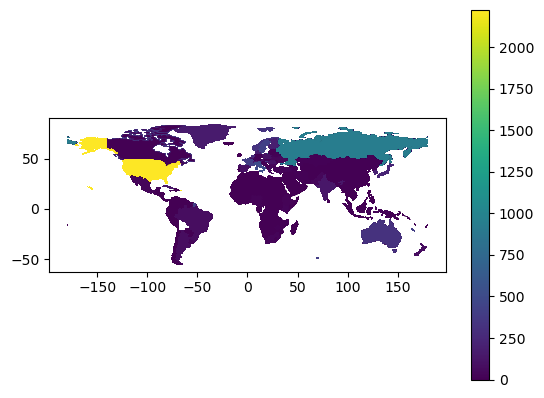

In [63]:
gdf.plot(column='Gold', legend=True)

### (ii) Silver medals

<Axes: >

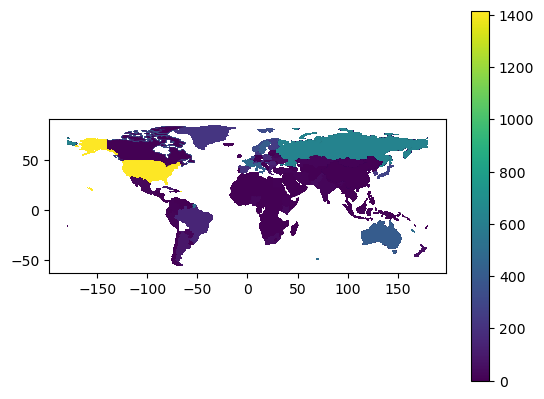

In [64]:
# Plot total medals
gdf.plot(column='Silver', legend=True)

### (iii) Bronze Medals

<Axes: >

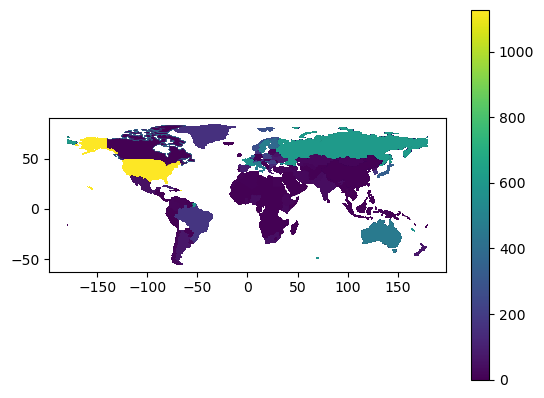

In [65]:
# Plot total medals
gdf.plot(column='Bronze', legend=True)

### No Medals

<Axes: >

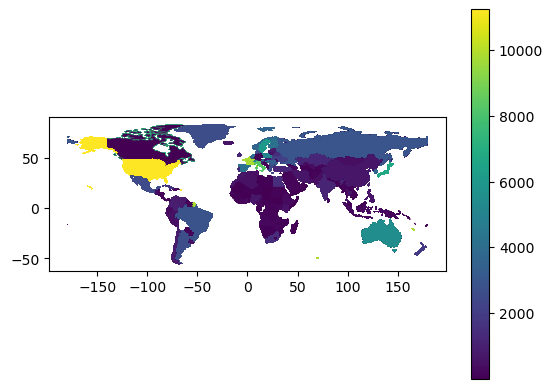

In [66]:
# Plot total medals
gdf.plot(column='No Medals', legend=True)

## (b) Number of Sports each country has won medals in

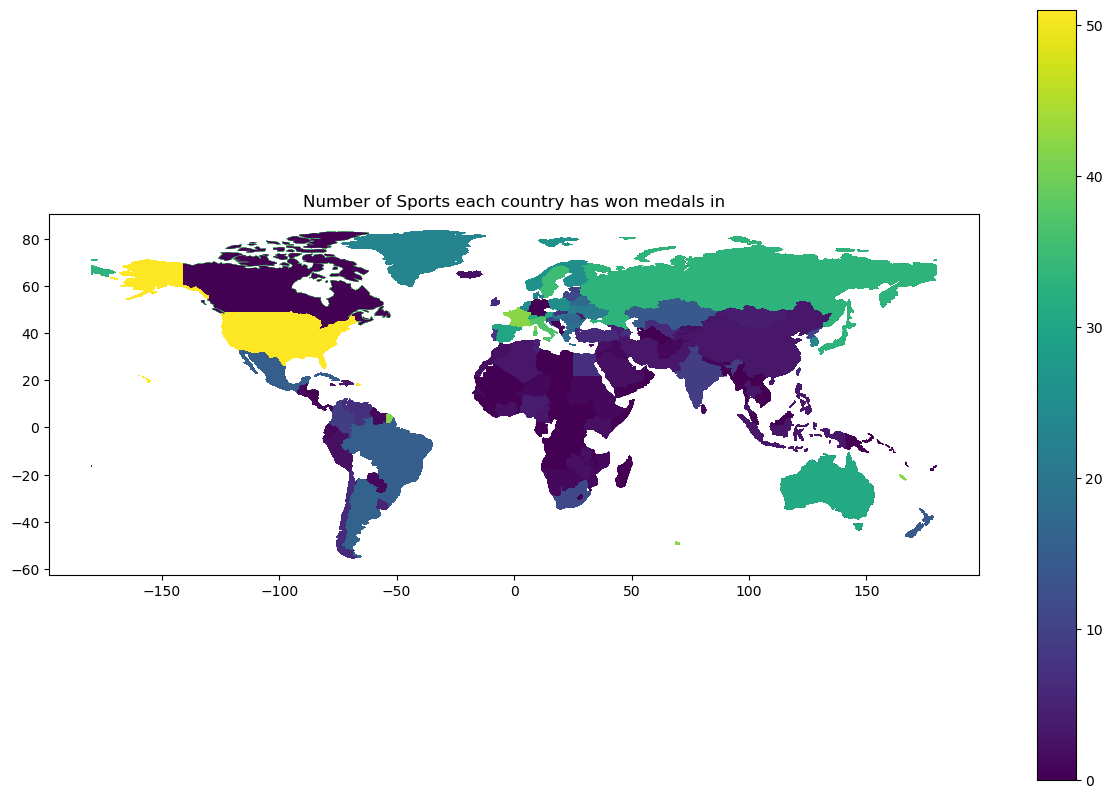

In [67]:
# Visualize the number of sports each country has won medals in
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf.plot(column='Sports_with_Medals', ax=ax, legend=True)
ax.set_title('Number of Sports each country has won medals in')
plt.show()

# gdf.plot(column='Sports_with_Medals', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

## (c)Total number of sports a country participated in at in the olympics

<Axes: >

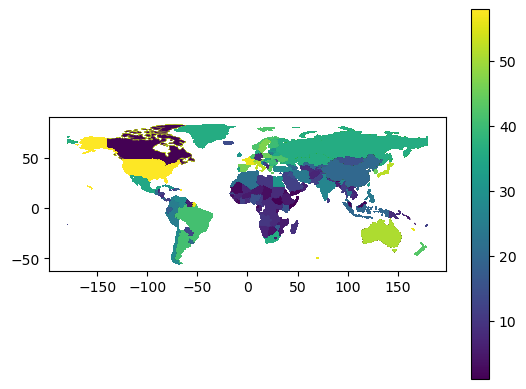

In [68]:
#  number of sports participated in
gdf.plot(column='Total_Sports', legend=True)

# 3.3 By Sport Analysis

In [69]:
# Calculate the number of golds, silvers, bronzes, and total participations for each sports
medal_counts = df_cleaned.groupby('Sport')['Medal'].value_counts().unstack().fillna(0)
medal_counts['Total_Participations'] = df_cleaned.groupby('Sport').size()

# (b) Calculate mean, max, min weights, heights, and ages for each sports
event_stats = df_cleaned.groupby('Sport').agg({
    'Weight': ['mean', 'max', 'min'],
    'Height': ['mean', 'max', 'min'],
    'Age': ['mean', 'max', 'min']
})

# Calculate the number of countries participating and medaling in each sports
countries_counts = df_cleaned.drop_duplicates(subset=['Sport', 'NOC']).groupby('Sport')['NOC'].nunique().rename('Num_Countries_Participated')
countries_counts_medaled = df_cleaned[df_cleaned['Medal'].notnull()].drop_duplicates(subset=['Sport', 'NOC']).groupby('Sport')['NOC'].nunique().rename('Num_Countries_Medaled')

# Merge all the calculated data
events_data = pd.concat([medal_counts, event_stats, countries_counts, countries_counts_medaled], axis=1, sort=False).fillna(0)

# Save to CSV
events_data.to_csv('events.csv')

In [70]:
events_df = pd.read_csv(r'events.csv')

In [71]:
events_df.head()

,Sport,Bronze,Gold,No Medals,Silver,Total_Participations,"('Weight', 'mean')","('Weight', 'max')","('Weight', 'min')","('Height', 'mean')","('Height', 'max')","('Height', 'min')","('Age', 'mean')","('Age', 'max')","('Age', 'min')",Num_Countries_Participated,Num_Countries_Medaled
0,Aeronautics,0.0,1.0,0.0,0.0,1,70.700000,70.7,70.7,180.000000,180.0,180.0,26.000000,26.0,26.0,1,1
1,Alpine Skiing,136.0,139.0,8210.0,141.0,8626,71.230767,93.0,45.0,175.090192,193.0,155.0,23.122537,37.0,14.0,100,100
2,Alpinism,0.0,17.0,0.0,0.0,17,70.700000,70.7,70.7,180.000000,180.0,180.0,27.235294,37.0,22.0,5,5
3,Archery,72.0,97.0,1673.0,85.0,1927,68.774883,93.0,45.0,173.862999,195.0,155.0,25.076284,37.0,14.0,89,89
4,Art Competitions,18.0,20.0,1284.0,26.0,1348,70.731306,93.0,63.0,179.946588,190.0,164.0,28.287092,37.0,14.0,45,45


In [72]:
events_df.columns


Index(['Sport', 'Bronze', 'Gold', 'No Medals', 'Silver',
       'Total_Participations', '('Weight', 'mean')', '('Weight', 'max')',
       '('Weight', 'min')', '('Height', 'mean')', '('Height', 'max')',
       '('Height', 'min')', '('Age', 'mean')', '('Age', 'max')',
       '('Age', 'min')', 'Num_Countries_Participated',
       'Num_Countries_Medaled'],
      dtype='object')

### (a) Plot mean weight against mean height

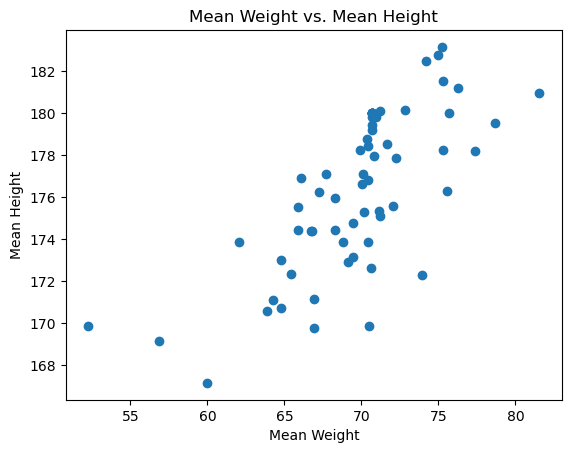

In [73]:

import matplotlib.pyplot as plt
plt.scatter(events_df["('Weight', 'mean')"], events_df["('Height', 'mean')"])
plt.xlabel('Mean Weight')
plt.ylabel('Mean Height')
plt.title('Mean Weight vs. Mean Height')
plt.show()

### (b) Plot weight against age and height against age

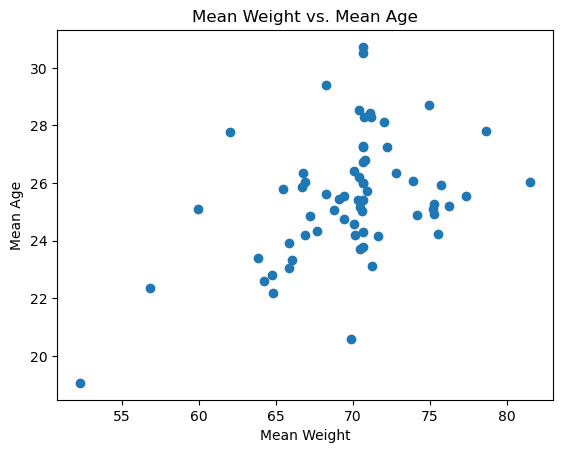

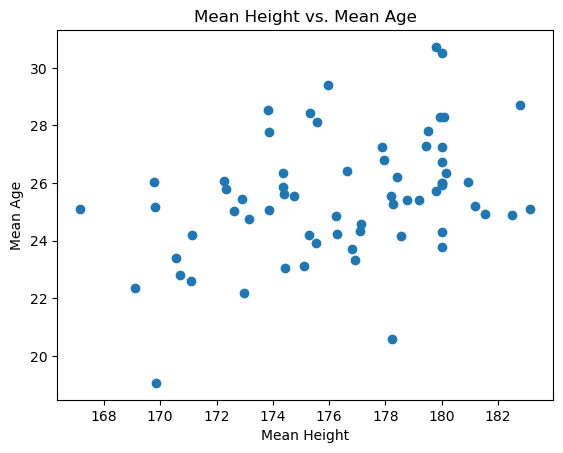

In [74]:

plt.scatter(events_df["('Weight', 'mean')"], events_df["('Age', 'mean')"])
plt.xlabel('Mean Weight')
plt.ylabel('Mean Age')
plt.title('Mean Weight vs. Mean Age')
plt.show()

plt.scatter(events_df["('Height', 'mean')"], events_df["('Age', 'mean')"])
plt.xlabel('Mean Height')
plt.ylabel('Mean Age')
plt.title('Mean Height vs. Mean Age')
plt.show()


### (c) Draw a histogram of how many participations each event has had

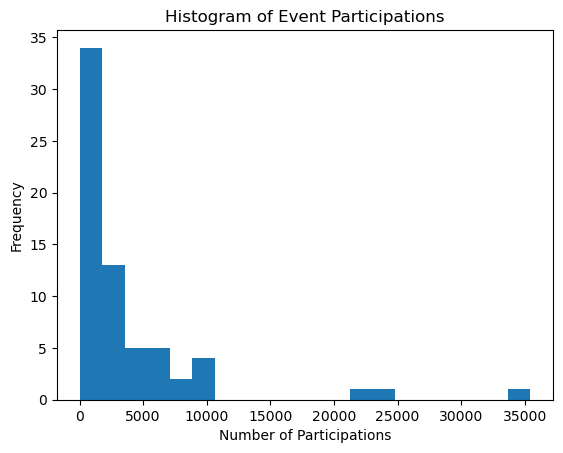

In [75]:

plt.hist(events_df['Total_Participations'], bins=20)  
plt.xlabel('Number of Participations')
plt.ylabel('Frequency')
plt.title('Histogram of Event Participations')
plt.show()

# 3.4 Time series Analysis

#### (a)  Creating a table called games.csv

In [76]:
import pandas as pd

# Load the athlete_events.csv file
df = pd.read_csv('athlete_events.csv')

# Group the data by Games and Season (Summer or Winter)
games_df = df.groupby(['Games', 'Season']).agg({
    'NOC': 'nunique',  
    'Sport': 'nunique',  
    'Event': 'nunique'  
}).reset_index()

# Rename columns for clarity
games_df.columns = ['Games', 'Season', 'Participants', 'UniqueSports', 'UniqueEvents']

# Save the games_df DataFrame to a CSV file
games_df.to_csv('games.csv', index=False)


In [77]:
df9 = pd.read_csv('games.csv')
df9.head()

,Games,Season,Participants,UniqueSports,UniqueEvents
0,1896 Summer,Summer,12,9,43
1,1900 Summer,Summer,31,20,90
2,1904 Summer,Summer,15,18,95
3,1906 Summer,Summer,21,13,74
4,1908 Summer,Summer,22,24,109


#### (b) line graph for each of these variables

In [78]:

games_df = pd.read_csv('games.csv')

# Define a function to extract the year
def extract_year(game):
    try:
        # Split the value by space and get the first part
        year = game.split()[0]
        # Attempt to convert it to an integer
        return int(year)
    except (ValueError, AttributeError):
        # Handle any errors (e.g., if the format is not as expected)
        return None

# Apply the function to extract the year and update the 'Games' column
games_df['Games'] = games_df['Games'].apply(extract_year)

# Drop rows with missing or None values in the 'Games' column
games_df.dropna(subset=['Games'], inplace=True)

# Save the DataFrame to a new CSV file
games_df.to_csv('updated_data.csv', index=False)


In [79]:


# # Separate data for Summer and Winter Olympics
# summer_df = games_df[games_df['Season'] == 'Summer']
# winter_df = games_df[games_df['Season'] == 'Winter']

# # Create line graphs for each variable
# def draw_line_graph(data, x_label, y_label, title):
#     plt.figure(figsize=(10, 6))
#     plt.plot(data['Games'], data[y_label], label='Summer', marker='o', linestyle='-', color='b')
#     plt.xlabel('Games')
#     plt.ylabel(y_label)
#     plt.title(title)
#     plt.xticks(rotation=90)
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Draw line graph for Participants
# draw_line_graph(summer_df, 'Games', 'Participants', 'Total Number of Participants in Summer Olympics')
# draw_line_graph(winter_df, 'Games', 'Participants', 'Total Number of Participants in Winter Olympics')

# # Draw line graph for Unique Sports
# draw_line_graph(summer_df, 'Games', 'UniqueSports', 'Number of Unique Sports in Summer Olympics')
# draw_line_graph(winter_df, 'Games', 'UniqueSports', 'Number of Unique Sports in Winter Olympics')

# # Draw line graph for Unique Events
# draw_line_graph(summer_df, 'Games', 'UniqueEvents', 'Number of Unique Events in Summer Olympics')
# draw_line_graph(winter_df, 'Games', 'UniqueEvents', 'Number of Unique Events in Winter Olympics')


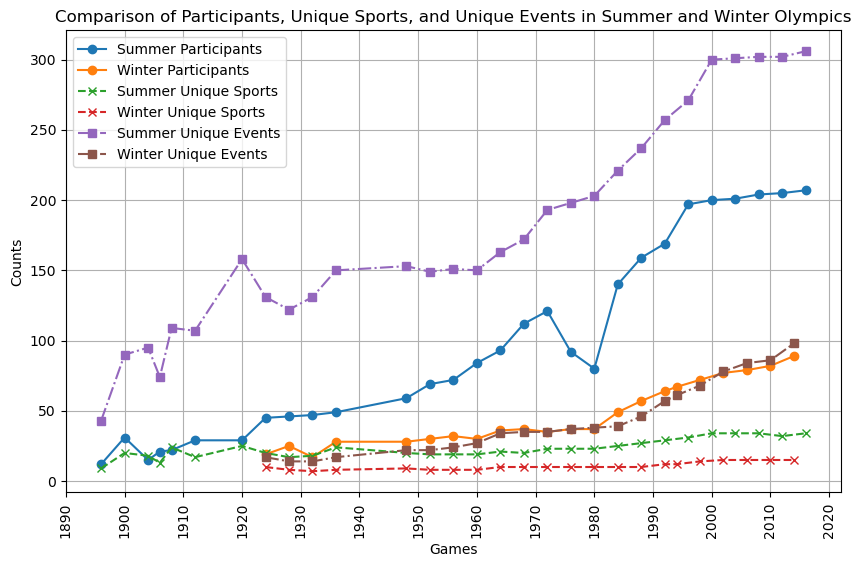

In [80]:
import matplotlib.pyplot as plt

# Load the games.csv file
games_df = pd.read_csv('updated_data.csv')

# Separate data for Summer and Winter Olympics
summer_df = games_df[games_df['Season'] == 'Summer']
winter_df = games_df[games_df['Season'] == 'Winter']

# Create a single graph with all three lines
plt.figure(figsize=(10, 6))

# Line for Participants
plt.plot(summer_df['Games'], summer_df['Participants'], label='Summer Participants', marker='o', linestyle='-')
plt.plot(winter_df['Games'], winter_df['Participants'], label='Winter Participants', marker='o', linestyle='-')

# Line for Unique Sports
plt.plot(summer_df['Games'], summer_df['UniqueSports'], label='Summer Unique Sports', marker='x', linestyle='--')
plt.plot(winter_df['Games'], winter_df['UniqueSports'], label='Winter Unique Sports', marker='x', linestyle='--')

# Line for Unique Events
plt.plot(summer_df['Games'], summer_df['UniqueEvents'], label='Summer Unique Events', marker='s', linestyle='-.')
plt.plot(winter_df['Games'], winter_df['UniqueEvents'], label='Winter Unique Events', marker='s', linestyle='-.')

# Set x-axis ticks in steps of 10
step = 10
plt.xticks(range(1890, 2021, step))

plt.xlabel('Games')
plt.ylabel('Counts')
plt.title('Comparison of Participants, Unique Sports, and Unique Events in Summer and Winter Olympics')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()


#### 3.5 Other visualisation

#### 3.5.1 Participation Trends Over Time


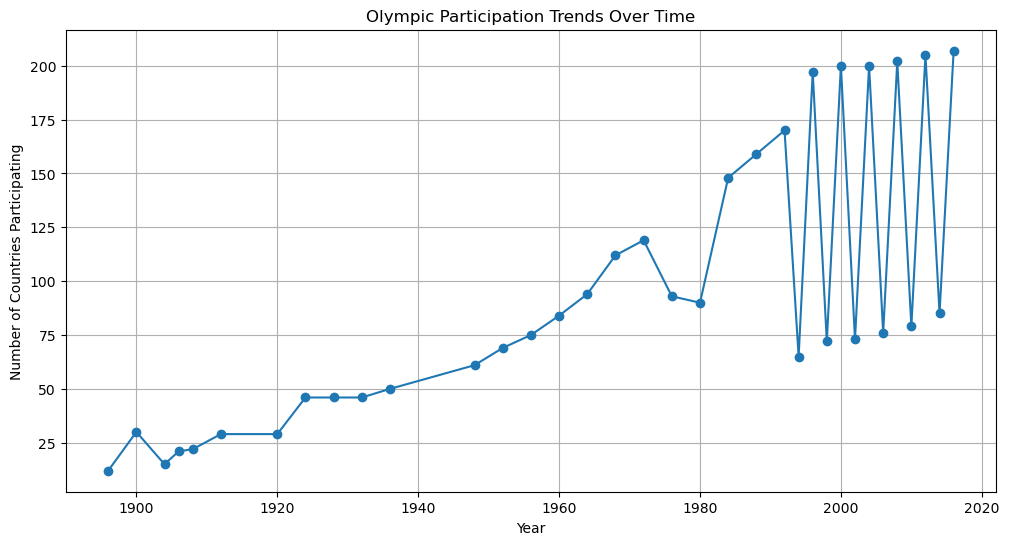

In [81]:
# Group the data by the 'Year' and count the unique countries participating each year
participation_by_year = df_cleaned.groupby('Year')['NOC'].nunique()

# Create a line chart to visualize the participation trends
plt.figure(figsize=(12, 6))
plt.plot(participation_by_year.index, participation_by_year.values, marker='o', linestyle='-')
plt.title('Olympic Participation Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Countries Participating')
plt.grid(True)

# Show the plot
plt.show()

##### From the graph above we observe that at the start there was few countries participating in the olympic but as times goes on the countries started to increase as the years increase. In 1972 we observe that the contries started to decrease until 1980, and then in 1980 they started to increase.

#### 3.5.2 Top Medal-Winning Countries: Highest total medal won

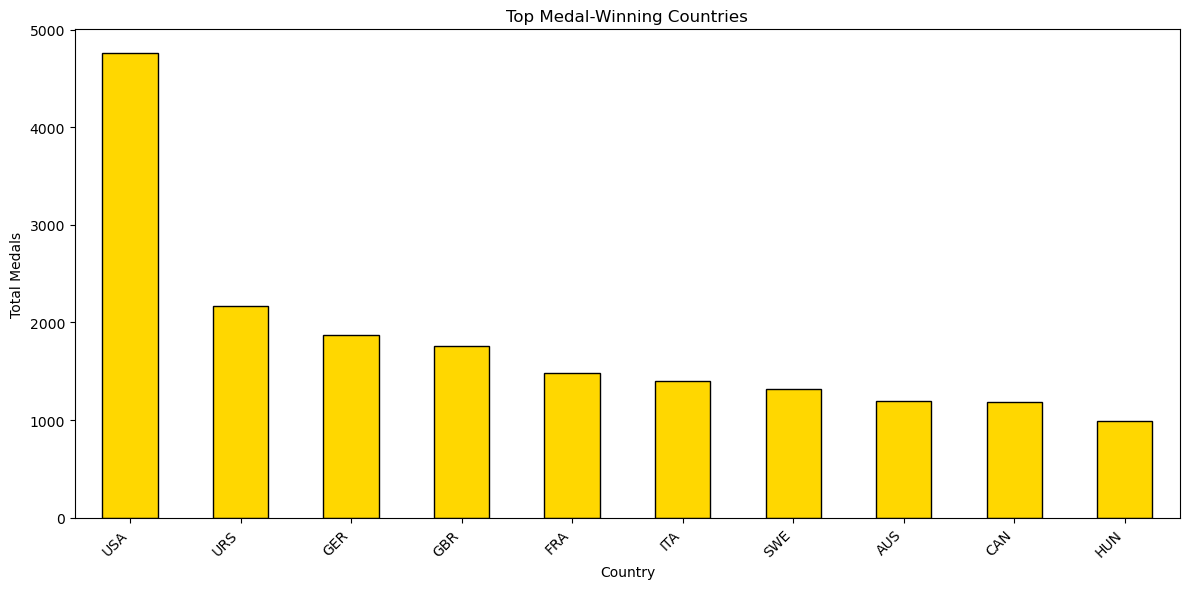

In [82]:
# Group the data by 'NOC' (country abbreviation) and sum the number of gold, silver, and bronze medals
country_medals = df7.groupby('NOC')[['Gold', 'Silver', 'Bronze']].sum()

# Calculate the total number of medals for each country
country_medals['Total Medals'] = country_medals['Gold'] + country_medals['Silver'] + country_medals['Bronze']

# Sort the countries by total medals in descending order to find the top medal-winning countries
top_countries = country_medals.sort_values('Total Medals', ascending=False).head(10)

# Create a bar chart to visualize the top medal-winning countries
plt.figure(figsize=(12, 6))
top_countries['Total Medals'].plot(kind='bar', color='gold', edgecolor='black')
plt.title('Top Medal-Winning Countries')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

#### From the graph above we observe that USA has won a lot of medals when it compared to other countries

##  NUMBER OF TIMES A COUNTRY HAS PARTICIPATED IN THE OLYMPICS

<Axes: >

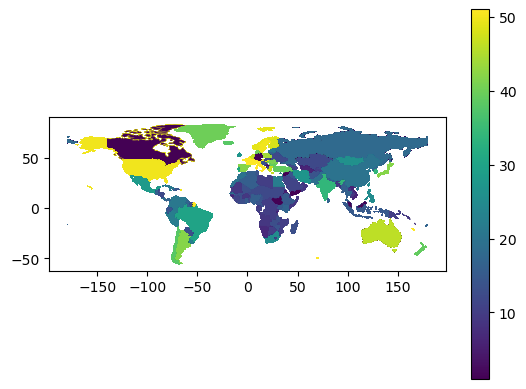

In [83]:
# number of olympics participated in
gdf.plot(column='Total_Olympics', legend=True)

## Total number of medals won by each country

<Axes: >

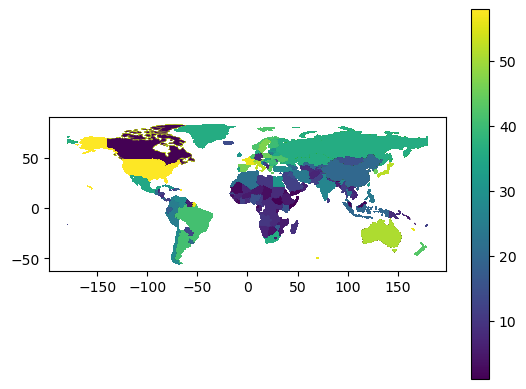

In [84]:
# Plot total medals
gdf.plot(column='Total_Medal', legend=True)